# Workflow & Hyperparameter Optimization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

👇 Import the house price data set. We will only keep numerical feature for sake of simplicity

Your goal will be to fit the best KNN Regressor. And in particular, how many "neighbors" (K in KNN) should you consider to best predict your house-price?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv')

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

👇 Split the data to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare with your buddy

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler().fit(X_train)
X_train=std_scaler.transform(X_train)
X_train

array([[-1.37511158, -0.87871936,  0.18688486, ..., -0.14608468,
        -0.11071095,  0.16828509],
       [-1.30912075, -0.87871936,  2.10800891, ..., -0.14608468,
        -1.96535592, -0.57711328],
       [ 0.57633154, -0.87871936, -0.45348983, ..., -0.14608468,
         0.26021804, -0.57711328],
       ...,
       [ 0.88978798, -0.87871936,  0.40034309, ...,  3.97498424,
        -1.22349793, -1.32251165],
       [ 0.04133445, -0.14400627, -0.45348983, ..., -0.14608468,
        -0.48163994,  0.16828509],
       [ 0.41135447, -0.87871936, -0.45348983, ..., -0.14608468,
        -0.11071095, -0.57711328]])

In [6]:
X_train=std_scaler.transform(X_train)

## 2. Scaling

Scaling is always very important for KNN.

❓ _Standard-Scale_ your training set

<AxesSubplot:>

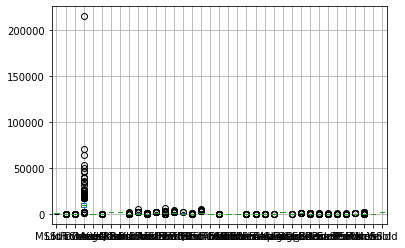

In [7]:
X.boxplot()

<AxesSubplot:>

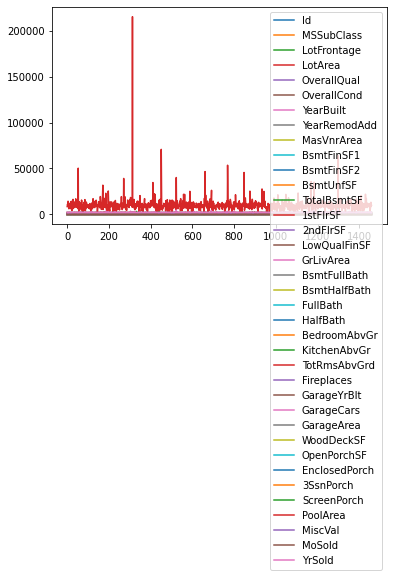

In [8]:
X.plot()

In [9]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]=std_scaler.fit_transform(X)


In [11]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.725807,0.092295,-0.233570,-0.205885,0.570704,-0.525499,0.992930,0.823953,0.462009,0.571581,...,0.235641,-0.760257,0.231036,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,0.153084
1,-1.723429,-0.865696,0.384834,-0.064358,-0.153825,2.284122,0.120665,-0.460746,-0.572748,1.152559,...,-0.224712,1.686090,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-0.498715,-0.596291
2,-1.721052,0.092295,-0.109889,0.138702,0.570704,-0.525499,0.928317,0.776371,0.282510,0.101672,...,0.549518,-0.760257,-0.064173,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.990125,0.153084
3,-1.718674,0.331793,-0.439705,-0.070512,0.570704,-0.525499,-1.850006,-0.746235,-0.572748,-0.475034,...,0.727382,-0.760257,-0.172934,4.083851,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,-1.345665
4,-1.716296,0.092295,0.549742,0.509132,1.295234,-0.525499,0.896011,0.681208,1.275032,0.462647,...,1.742250,0.815913,0.588393,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,2.106755,0.153084


## 3. Baseline KNN model

❓ 5-fold cross validate a simple KNN regressor taking into account only the closest neighbor, and compute its mean cv-score

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

knn_model=KNeighborsRegressor()
cv_result=cross_validate(knn_model,X_train,y_train,cv=5,)
cv_result['test_score'].mean()

0.6708281672850706

## 4. Grid search

Let's use sklearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross validate each combination
- Be sure to maximize your performance time using `n_jobs`

In [13]:
from sklearn.model_selection import GridSearchCV
knn_model=KNeighborsRegressor()
grid ={"n_neighbors":[1,5,10,20,50]}
search= GridSearchCV(knn_model,grid,cv=5,scoring="r2",n_jobs=-1)
search.fit(X_train,y_train)





GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]}, scoring='r2')

❓ According to the grid search, what is the optimal K value?

In [14]:
search.best_score_

0.6708281672850706

In [15]:
search.best_params_

{'n_neighbors': 5}

In [16]:
search.best_estimator_

KNeighborsRegressor()

❓ What is the best score the optimal K value produced?

In [17]:
from sklearn.model_selection import GridSearchCV
knn_model=KNeighborsRegressor()
grid ={"n_neighbors":np.arange(10,30,1)}
search= GridSearchCV(knn_model,grid,cv=5,scoring="r2",n_jobs=-1)
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])},
             scoring='r2')

We now have an idea about where the best k lies, but some of the values we did not try could be better!

Re-run a fine-grain grid search with k values around to your previous best value

❓ What is the `best_score` and `best_k` you find?

In [18]:
search.best_score_

0.6602950941866347

In [19]:
search.best_params_

{'n_neighbors': 10}

In [20]:
best_score = search.best_score_
best_k = 14

#### 🧪 Test your code

In [21]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/05-Model-Tuning/01-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_knn.py::TestKnn::test_best_k PASSED                           [ 50%]
tests/test_knn.py::TestKnn::test_best_score FAILED                       [100%]

=================================== FAILURES ===================================
___________________________ TestKnn.test_best_score ____________________________

self = <tests.test_knn.TestKnn testMethod=test_best_score>

    def test_best_score(self):
>       self.assertGreater(self.result.best_score, 0.76)
E       AssertionError: 0.6602950941866347 not greater than 0.76

tests/test_knn.py:10: AssertionError
=========================

### Visual check

☝️ This problem is actually simple enough to perform a grid search manually.
- Loop manually over all values of k from 1 to 50 and store the mean cv-scores of each model in a list.
- Plot the score as a function of k to visualy find the best k

In [22]:
knn_score=[]
neighbours=[]
for k in range(1,50):
    knn_model=KNeighborsRegressor(n_neighbors=k)
    cv_result=cross_validate(knn_model,X,y)
    knn_score.append(cv_result['test_score'].mean())
    neighbours.append(k)
    
    
    

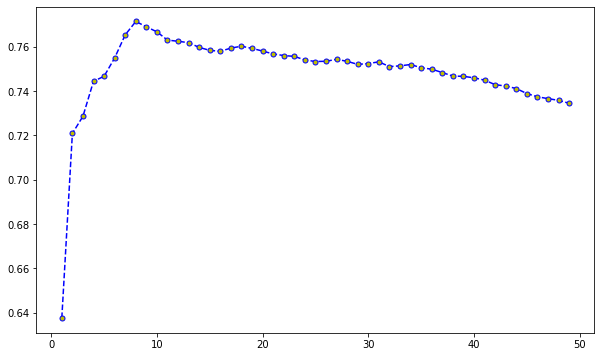

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,50),knn_score,color="blue",linestyle="dashed",marker="o",markersize="5",markerfacecolor='y')

❓Can you guess what makes GridSearchCV a better option than such manual loop ?
 
<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to paralellize search of each CPU
- What if you had multiple hyper-parameters to co-optimize ?
</details>

## 5. Multiple params

KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` [see docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓Use GridSearchCV to search for best `k` and `p` at the same time: Try all combinations for `k` = [1, 5, 10, 20, 50] and `p` = [1, 2, 3]. 

In [24]:
new_grid={"n_neighbors":[1,5,10,20,50],
          "p":[1,2,3]}
# ''''''
# pint, default=2Power parameter for the Minkowski metric. When p = 1,
# this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) 
# for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
# ''''''

In [25]:
knn_model=KNeighborsRegressor()
new_search= GridSearchCV(knn_model,new_grid,cv=5,scoring="r2",)
new_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]},
             scoring='r2')

❓ How many models did you trained overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

❓ What are the best parameters and the best score?

In [26]:
new_search.best_params_

{'n_neighbors': 10, 'p': 1}

## 6. Random Search

Now let's see if a Random Search can find a better combination with the same number of model fits?
Use `RandomizedSearchCV` to
- Randomly sample `k` from a uniform `randint(1,50)` distribition
- Sample `p` from a list [1,2,3]
- Use the correct number of `n_iter` and `cv` to fit the exact same number of models than in your previous GridSearchCV.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
new2_grid={"n_neighbors":[np.random.randint(1,50)],
          "p":[1,2,3]}
knn_model=KNeighborsRegressor()

search2=RandomizedSearchCV(knn_model,
                         new2_grid,
                         n_iter=15,
                         cv=5,n_jobs=-1)
search2.fit(X_train,y_train)



/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=15. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=15, n_jobs=-1,
                   param_distributions={'n_neighbors': [49], 'p': [1, 2, 3]})

In [28]:
print(search2.best_score_)
print(search2.best_params_)

0.6543890859419936
{'p': 1, 'n_neighbors': 49}


In [29]:
print(search.best_score_)
print(search.best_params_)

0.6602950941866347
{'n_neighbors': 10}


In [30]:
print(new_search.best_score_)
print(new_search.best_params_)

0.6800882320491163
{'n_neighbors': 10, 'p': 1}


## 7. Generalization

👇 This is your final chance to fine-tune your model
- Refine your RandomsearchCV if you wish
- Choose your best model hyper-params and instantiate it
- Re-fit it on the __entire__ train set

In [31]:
new_model=search2.best_estimator_

In [32]:
new_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=49, p=1)

In [33]:
from sklearn.metrics import r2_score
y_pred=new_model.predict(X_test)
r2_score(y_test, y_pred)

-4.354731771440459

In [34]:
std_scaler=StandardScaler().fit(X_train)
X_train=std_scaler.transform(X_train)
X_train

array([[-1.37511158, -0.87871936,  0.18688486, ..., -0.14608468,
        -0.11071095,  0.16828509],
       [-1.30912075, -0.87871936,  2.10800891, ..., -0.14608468,
        -1.96535592, -0.57711328],
       [ 0.57633154, -0.87871936, -0.45348983, ..., -0.14608468,
         0.26021804, -0.57711328],
       ...,
       [ 0.88978798, -0.87871936,  0.40034309, ...,  3.97498424,
        -1.22349793, -1.32251165],
       [ 0.04133445, -0.14400627, -0.45348983, ..., -0.14608468,
        -0.48163994,  0.16828509],
       [ 0.41135447, -0.87871936, -0.45348983, ..., -0.14608468,
        -0.11071095, -0.57711328]])

In [35]:
from sklearn.model_selection import RandomizedSearchCV
best_knn_model=KNeighborsRegressor()

last_grid={"n_neighbors":[10],
           "p":[1]}

last_search= RandomizedSearchCV(knn_model,last_grid,cv=5,scoring="r2",n_jobs=-1,n_iter=15)
last_search.fit(X_train,y_train)

last_search.best_score_

/Users/shu/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=15. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7978142226309175

👇 Time has come to discover our model's performance on the **unseen** test set `X_test`. Compute the r2 score for the test set and save it as `r2_test`.

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler().fit(X_train)
X_train=std_scaler.transform(X_train)
X_train

array([[-1.37511158, -0.87871936,  0.18688486, ..., -0.14608468,
        -0.11071095,  0.16828509],
       [-1.30912075, -0.87871936,  2.10800891, ..., -0.14608468,
        -1.96535592, -0.57711328],
       [ 0.57633154, -0.87871936, -0.45348983, ..., -0.14608468,
         0.26021804, -0.57711328],
       ...,
       [ 0.88978798, -0.87871936,  0.40034309, ...,  3.97498424,
        -1.22349793, -1.32251165],
       [ 0.04133445, -0.14400627, -0.45348983, ..., -0.14608468,
        -0.48163994,  0.16828509],
       [ 0.41135447, -0.87871936, -0.45348983, ..., -0.14608468,
        -0.11071095, -0.57711328]])

In [38]:
X_test=std_scaler.transform(X_test)


In [39]:
best_model=last_search.best_estimator_

In [40]:
from sklearn.metrics import r2_score
y_pred=best_model.predict(X_test)
r2_test=r2_score(y_test, y_pred)

In [41]:
last_search.best_estimator_

KNeighborsRegressor(n_neighbors=10, p=1)

❓ Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- An non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

#### 🧪 Test your code 

In [42]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/05-Model-Tuning/01-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_r2.py::TestR2::test_r2 PASSED                                 [100%]

============================== 1 passed in 0.32s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master


## 🏁 Congratulation. Please push the exercise once completed